In [1]:
import pandas as pd

df = pd.read_csv("labeled_audio_features.csv")

df

,Filename,File_ID,Spectral Centroid,Spectral Bandwidth,Energy,Zero Crossing Rate,MFCC_1,MFCC_2,MFCC_3,MFCC_4,...,LogMel_127,LogMel_128,SpectralContrast_1,SpectralContrast_2,SpectralContrast_3,SpectralContrast_4,SpectralContrast_5,SpectralContrast_6,SpectralContrast_7,gender
0,HW1_Q5_810801072_Male.mp3,810801072.0,1190.596659,860.304927,0.018082,0.104027,-359.63320,115.977516,-82.352750,-10.930631,...,-54.151608,-54.151608,24.698325,21.847045,17.482008,15.427769,18.416845,49.790245,18.596420,male
1,HW1.Q4j.810102087_female.mp3,810102087.0,1171.308126,811.033637,0.042049,0.112831,-316.87390,124.256260,-83.462720,-7.142929,...,-51.461970,-51.461970,27.021699,18.915492,19.326000,16.883139,18.082144,44.165544,24.532498,female
2,HW1_Q3_810103262_male.mp3,810103262.0,962.185691,654.163178,0.073033,0.085811,-359.52280,82.929085,-38.925040,-2.616090,...,-45.378930,-45.378930,26.264901,26.842508,26.764221,23.461604,25.222351,45.761993,22.058125,male
3,HW1_Q6_810600133_female.mp3,810600133.0,1394.939738,967.011634,0.040616,0.127732,-327.11000,77.596170,-66.509550,2.692544,...,-46.676920,-46.676920,25.077578,21.766326,22.791543,20.759334,20.601537,50.721059,21.332874,female
4,HW1_Q4_159403005_male.mp3,159403005.0,1039.728892,812.143556,0.046665,0.082820,-333.15906,112.615900,-63.770080,-12.050776,...,-48.922920,-48.922920,22.753146,26.612855,20.602262,17.249414,19.077054,50.790446,19.150664,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,HW1_Q4_810102066_male.mp3,810102066.0,1300.428638,940.624413,0.048195,0.123193,-296.99808,106.049280,-81.401634,15.752192,...,-49.962925,-49.962925,25.755823,23.254553,19.575685,17.371709,17.263083,52.613275,19.480460,male
778,HW1_Q5_810103158_male.mp3,810103158.0,1092.733269,757.320480,0.055939,0.104368,-332.57822,109.994675,-53.518814,-24.932074,...,-47.142326,-47.142326,25.207737,22.437619,20.206212,17.662317,19.485465,49.553608,19.814700,male
779,HW1_Q3_810103241_male.mp3,810103241.0,1393.106503,902.804283,0.043221,0.136728,-354.21555,71.889366,-49.721287,2.120570,...,-46.563490,-46.563490,26.820445,21.588043,25.760321,22.174087,26.787853,51.508139,22.561897,male
780,HW1_Q5_810100222_female.mp3,810100222.0,1032.301600,738.187973,0.032410,0.096798,-385.17337,84.672740,-25.377174,-8.708000,...,-46.350407,-46.350407,23.926418,23.754249,24.528042,21.914459,23.463030,47.133867,22.265805,female


# Gender Classification

In [2]:
from sklearn.decomposition import PCA


# Select only the Log Mel Spectrogram features
logmel_features = [col for col in df.columns if col.startswith("LogMel_")]
X_logmel = df[logmel_features]

# Apply PCA to reduce dimensions (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_logmel)

# Convert back to DataFrame
pca_columns = [f'PCA_{i+1}_LogMel' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

# Drop original Log Mel Spectrogram features and add new PCA features
df = df.drop(columns=logmel_features)
df = pd.concat([df, df_pca], axis=1)

print(f"Original Log Mel Features: {X_logmel.shape[1]}")
print(f"Reduced Log Mel Features: {X_pca.shape[1]}")

Original Log Mel Features: 128
Reduced Log Mel Features: 9


In [3]:
df

,Filename,File_ID,Spectral Centroid,Spectral Bandwidth,Energy,Zero Crossing Rate,MFCC_1,MFCC_2,MFCC_3,MFCC_4,...,gender,PCA_1_LogMel,PCA_2_LogMel,PCA_3_LogMel,PCA_4_LogMel,PCA_5_LogMel,PCA_6_LogMel,PCA_7_LogMel,PCA_8_LogMel,PCA_9_LogMel
0,HW1_Q5_810801072_Male.mp3,810801072.0,1190.596659,860.304927,0.018082,0.104027,-359.63320,115.977516,-82.352750,-10.930631,...,male,-2.607820,-33.795532,-2.442312,7.253254,2.051352,4.490312,5.228817,7.312095,-1.653790
1,HW1.Q4j.810102087_female.mp3,810102087.0,1171.308126,811.033637,0.042049,0.112831,-316.87390,124.256260,-83.462720,-7.142929,...,female,40.799527,-25.561380,-8.029452,-6.236530,-7.681814,5.692460,8.410901,13.930295,8.509958
2,HW1_Q3_810103262_male.mp3,810103262.0,962.185691,654.163178,0.073033,0.085811,-359.52280,82.929085,-38.925040,-2.616090,...,male,-20.748574,23.295778,2.369420,8.366372,6.857870,8.146525,-7.794500,-4.296828,2.678711
3,HW1_Q6_810600133_female.mp3,810600133.0,1394.939738,967.011634,0.040616,0.127732,-327.11000,77.596170,-66.509550,2.692544,...,female,17.458803,15.217565,21.063499,2.726795,-13.471037,-5.313799,8.142098,2.580769,0.545889
4,HW1_Q4_159403005_male.mp3,159403005.0,1039.728892,812.143556,0.046665,0.082820,-333.15906,112.615900,-63.770080,-12.050776,...,male,17.748840,-9.532070,-11.866897,3.523785,5.342845,4.370928,1.109144,-0.873636,1.932672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,HW1_Q4_810102066_male.mp3,810102066.0,1300.428638,940.624413,0.048195,0.123193,-296.99808,106.049280,-81.401634,15.752192,...,male,58.525567,-7.386061,15.039841,-15.761263,8.329770,0.505218,3.820365,-6.147370,-0.039656
778,HW1_Q5_810103158_male.mp3,810103158.0,1092.733269,757.320480,0.055939,0.104368,-332.57822,109.994675,-53.518814,-24.932074,...,male,13.820304,0.096904,-20.735485,14.475575,2.020939,-8.561323,-3.925206,-4.570513,-6.187480
779,HW1_Q3_810103241_male.mp3,810103241.0,1393.106503,902.804283,0.043221,0.136728,-354.21555,71.889366,-49.721287,2.120570,...,male,-14.377637,23.527056,19.196173,8.823776,-0.476459,-7.430007,3.937373,-13.748444,0.309889
780,HW1_Q5_810100222_female.mp3,810100222.0,1032.301600,738.187973,0.032410,0.096798,-385.17337,84.672740,-25.377174,-8.708000,...,female,-48.420844,25.127838,-9.025960,-1.920097,-6.467009,4.735607,9.493908,-3.967990,2.385022


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


# Selecting 32 numeric features for training
X = df.drop(columns=["gender", "File_ID", "Filename"])

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

target_column = "gender"  # Assuming gender is the target column
y = df[target_column]

# Encode target variable
y = (y == 'male').astype(int)  # Convert 'male' to 1 and 'female' to 0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name="Classifier"):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Female", "Male"], yticklabels=["Female", "Male"])
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_probs, model_name="Classifier"):
    fpr, tpr, _ = roc_curve(y_true, y_probs)  # Get FPR & TPR
    roc_auc = auc(fpr, tpr)  # Compute AUC score

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line for random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

### >> using Neural Networks

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(33,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


2025-02-04 18:52:09.300303: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-04 18:52:09.313154: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-04 18:52:09.435806: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-04 18:52:09.562822: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738682529.675068   12982 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738682529.70

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save the trained model
model.save("gender_classification_model.h5")

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5402 - loss: 0.6786 - val_accuracy: 0.7602 - val_loss: 0.4953
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7736 - loss: 0.4492 - val_accuracy: 0.8214 - val_loss: 0.3774
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8877 - loss: 0.3242 - val_accuracy: 0.9286 - val_loss: 0.2736
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9414 - loss: 0.2294 - val_accuracy: 0.9490 - val_loss: 0.1996
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9484 - loss: 0.1766 - val_accuracy: 0.9592 - val_loss: 0.1513
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9812 - loss: 0.1143 - val_accuracy: 0.9592 - val_loss: 0.1241
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9792 - loss: 0.1014 - val_accuracy: 0.9592 - val_loss: 0.1090
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9885 - loss: 0.0688 - val_accuracy: 0.9745 - val_los

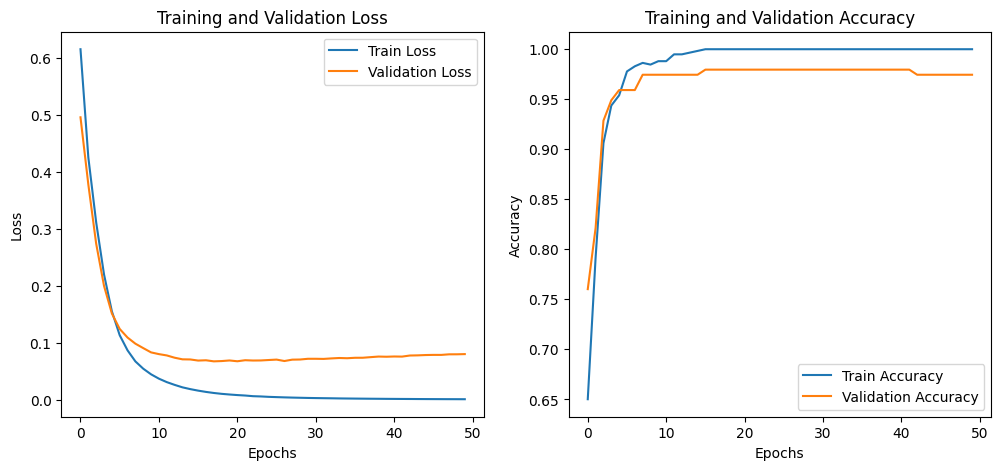

In [14]:
import matplotlib.pyplot as plt


# Plot training history
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


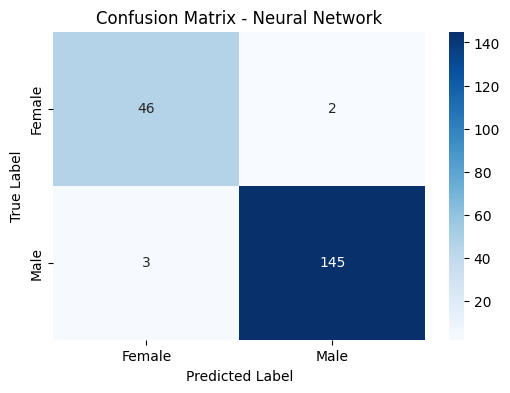

In [15]:
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions
plot_confusion_matrix(y_test, y_pred_nn, "Neural Network")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


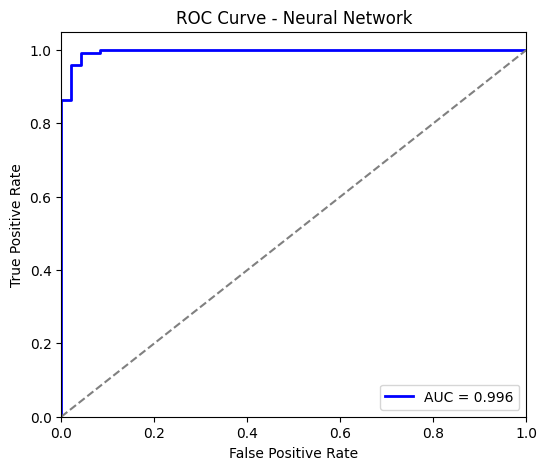

In [23]:
y_probs_nn = model.predict(X_test).flatten()  # Get probabilities
plot_roc_curve(y_test, y_probs_nn, "Neural Network")

### >> Using SVM

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [17]:
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))

SVM Accuracy:  0.9744897959183674


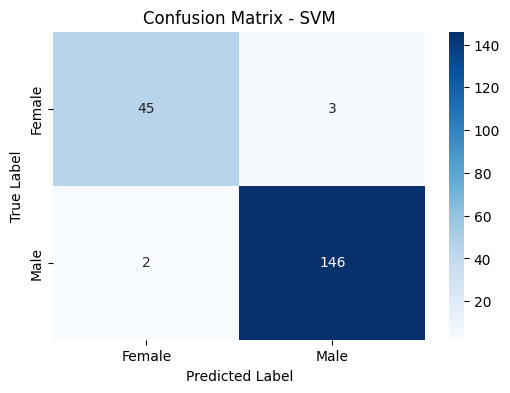

In [18]:
y_pred_svm = svm_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

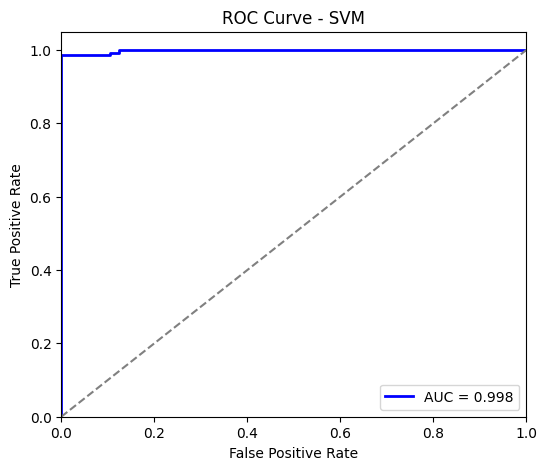

In [24]:
y_probs_svm = svm_model.decision_function(X_test)  # Get decision scores
plot_roc_curve(y_test, y_probs_svm, "SVM")

### >> Using Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy:  0.9438775510204082


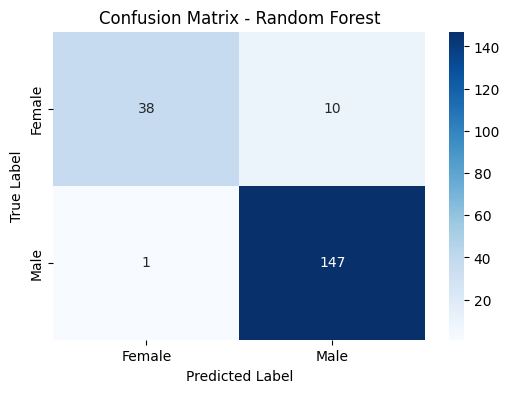

In [20]:
y_pred_rf = rf_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

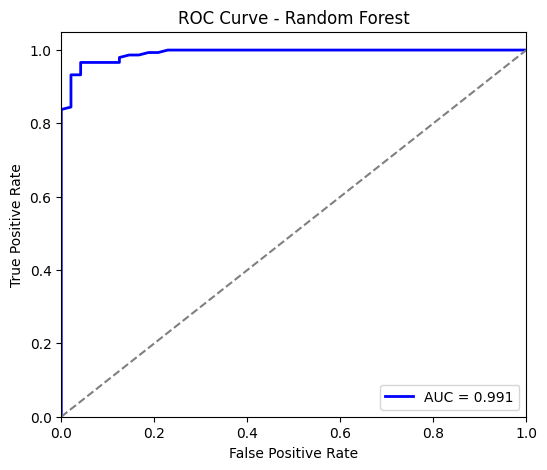

In [25]:
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]  # Get positive class probabilities
plot_roc_curve(y_test, y_probs_rf, "Random Forest")

### >> Using Gradient Boosting (XGBoost)

In [5]:
from sklearn import set_config
set_config(display='text')

In [6]:
from xgboost import XGBClassifier

def fixed_sklearn_tags(self):
    # Define minimal tags manually, or leave empty if not required.
    return {"estimator_type": "classifier"}

XGBClassifier.__sklearn_tags__ = fixed_sklearn_tags

In [7]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:46:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [9]:
from sklearn.metrics import accuracy_score

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9540816326530612


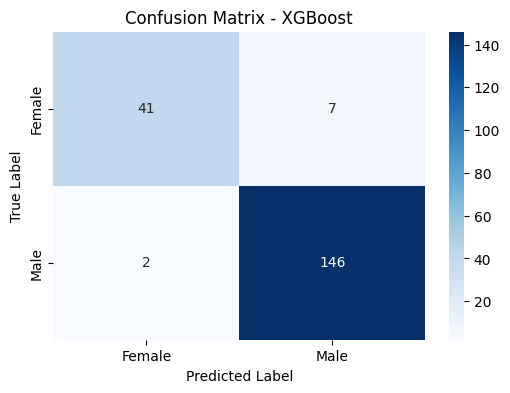

In [21]:
y_pred_xgb = xgb_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

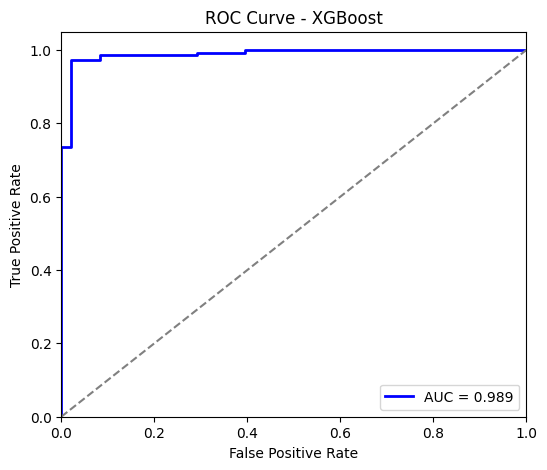

In [26]:
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Get positive class probabilities
plot_roc_curve(y_test, y_probs_xgb, "XGBoost")

---

# closed-set authentication

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Selecting 32 numeric features for training
X = df.drop(columns=["gender", "File_ID", "Filename"])

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Target column (categorical File_ID)
target_column = "File_ID"
df = df.dropna(subset=[target_column])  # Drop rows where File_ID is NaN
y = df[target_column].astype(str)  # Convert to string to ensure proper encoding

# Encode File_ID as categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check class distribution
import pandas as pd
y_counts = pd.Series(y).value_counts()

# Drop classes that have less than 2 samples
valid_classes = y_counts[y_counts >= 2].index  # Keep only classes with at least 2 samples
valid_mask = pd.Series(y).isin(valid_classes)  # Mask for valid samples

X = X[valid_mask]
y = y[valid_mask]

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [140]:
print(y.isna().sum())  # Count NaN values in target column

AttributeError: 'numpy.ndarray' object has no attribute 'isna'

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Copy the DataFrame to avoid modifying the original
df_copy = df.copy()

# Step 2: Remove rows where 'File_ID' is NaN
df_copy = df_copy.dropna(subset=['File_ID'])

# Step 3: Remove rows where 'File_ID' occurs less than two times
file_id_counts = df_copy['File_ID'].value_counts()
valid_file_ids = file_id_counts[file_id_counts >= 2].index  # Keep File_IDs that appear at least twice
df_copy = df_copy[df_copy['File_ID'].isin(valid_file_ids)]

# Step 4: Remove the first column (if it's not needed)
df_copy = df_copy.drop(columns=[df_copy.columns[0]])

# Step 5: Modify the 'gender' column (assuming 'gender' exists)
df_copy['gender'] = df_copy['gender'].map({'male': 0, 'female': 1})

# Step 6: Assign 'File_ID' as the target and drop it from features
y = df_copy['File_ID']
X = df_copy.drop(columns=['File_ID', 'gender'])  # Drop 'File_ID' and 'gender' from features

# Step 7: One-hot encode the labels ('File_ID')
y_encoded = pd.get_dummies(y, prefix='File_ID')  # Convert categorical File_ID into one-hot vectors

# Step 8: Split the data into train and test sets, stratifying based on gender
X_train, X_test, y_train, y_test, gender_train, gender_test = train_test_split(
    X, y_encoded, df_copy['gender'], test_size=0.25, stratify=df_copy['gender'], random_state=42
)

# Step 9: Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes to confirm
print(f"Training data shape: {X_train_scaled.shape}, {y_train.shape}")
print(f"Test data shape: {X_test_scaled.shape}, {y_test.shape}")

Training data shape: (581, 33), (581, 111)
Test data shape: (194, 33), (194, 111)


now we have `X_train_scaled` and `y_train`, `X_test_scaled`, `y_test`

### >> Using Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Convert y_train and y_test back to integer labels
y_train_labels = np.argmax(y_train.to_numpy(), axis=1)
y_test_labels = np.argmax(y_test.to_numpy(), axis=1)

# Train logistic regression model
model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model_lr.fit(X_train_scaled, y_train_labels)

# Predict
y_pred_lr = model_lr.predict(X_test_scaled)

/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [150]:
from sklearn.metrics import accuracy_score, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test_labels, y_pred_lr))
print(classification_report(y_test_labels, y_pred_lr))

Logistic Regression Accuracy: 0.8247422680412371
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         1
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       1.00      0.75      0.86         4
          12       1.00      1.00      1.00         2
          13       0.00      0.00      0.00         1
          14       0.33      1.00      0.50         1
          15       1.00      1.00      1.00         1
          16       1.00      1.0

/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. 

/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


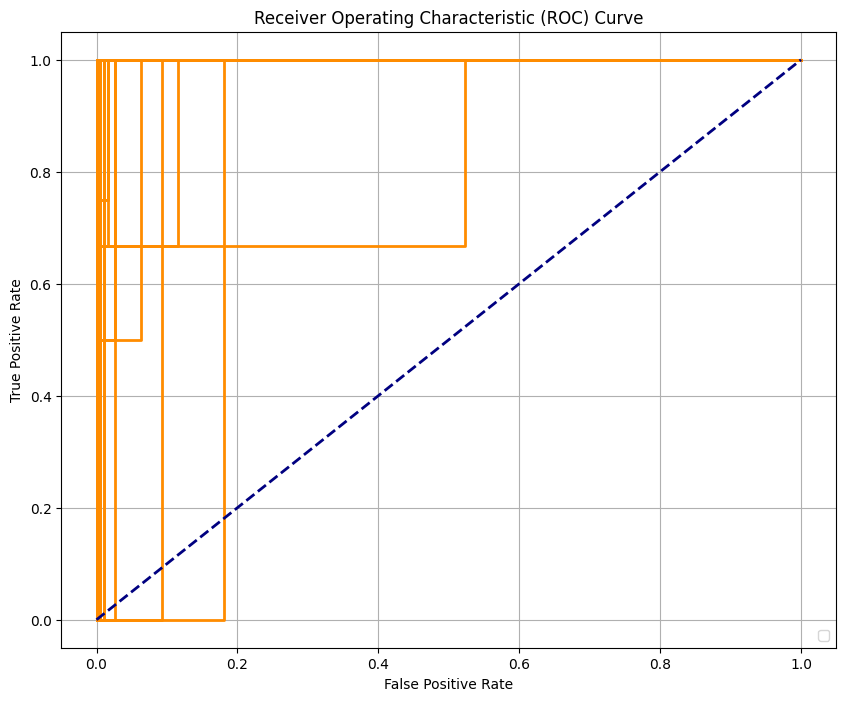

In [151]:
from sklearn.preprocessing import label_binarize

# Get class probabilities for each class
y_pred_prob = model_lr.predict_proba(X_test_scaled)  # Shape (num_samples, num_classes)

# Binarize the true labels for ROC curve calculation (One-vs-Rest)
y_test_binarized = label_binarize(y_test_labels, classes=np.unique(y_train_labels))  # Shape (num_samples, num_classes)

# Number of classes
n_classes = y_test_binarized.shape[1]

# ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

# ROC curve for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)

# Plot diagonal (chance level)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### >> using Random Forest Classifier

In [129]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Convert one-hot encoded y_train and y_test to class indices
y_train_labels = np.argmax(y_train, axis=1)  # Convert one-hot to integer labels
y_test_labels = np.argmax(y_test, axis=1)    # Convert one-hot to integer labels

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_labels)

RandomForestClassifier(random_state=42)

In [130]:
# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test_labels, y_pred_rf))
print(classification_report(y_test_labels, y_pred_rf))

Random Forest Accuracy: 0.7422680412371134
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.33      1.00      0.50         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         1
           9       0.50      0.50      0.50         2
          10       1.00      0.67      0.80         3
          11       1.00      0.25      0.40         4
          12       0.50      1.00      0.67         2
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       1.00      1.00     

/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. 

/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


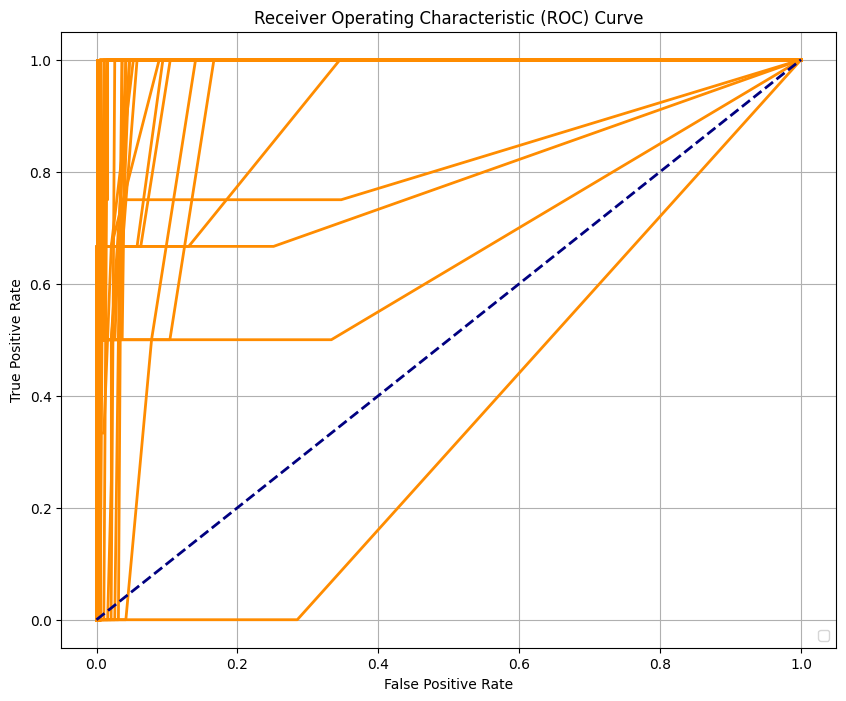

In [136]:
from sklearn.preprocessing import label_binarize

# Get class probabilities for each class
y_pred_prob = rf_model.predict_proba(X_test_scaled)  # Shape (num_samples, num_classes)

# Binarize the true labels for ROC curve calculation (One-vs-Rest)
y_test_binarized = label_binarize(y_test_labels, classes=np.unique(y_train_labels))  # Shape (num_samples, num_classes)

# Number of classes
n_classes = y_test_binarized.shape[1]

# ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

# ROC curve for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)

# Plot diagonal (chance level)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### >> Using SVM

In [126]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Convert one-hot encoded labels to class indices
y_train_labels = np.argmax(y_train, axis=1)  # Convert one-hot to integer labels
y_test_labels = np.argmax(y_test, axis=1)    # Convert one-hot to integer labels

# Train SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)  # 'rbf' is a common kernel
svm_model.fit(X_train_scaled, y_train_labels)

SVC(probability=True, random_state=42)

In [127]:
# Predict class labels
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate model
print("SVM Accuracy:", accuracy_score(y_test_labels, y_pred_svm))
print(classification_report(y_test_labels, y_pred_svm))

SVM Accuracy: 0.7010309278350515
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.33      1.00      0.50         1
           3       1.00      1.00      1.00         1
           4       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         1
           9       0.50      1.00      0.67         2
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.50      1.00      0.67         2
          13       0.00      0.00      0.00         1
          14       0.33      1.00      0.50         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00     

/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. 

/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/davinci/GitHub/JANJAN/ml_practices/university/ml/final project/env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


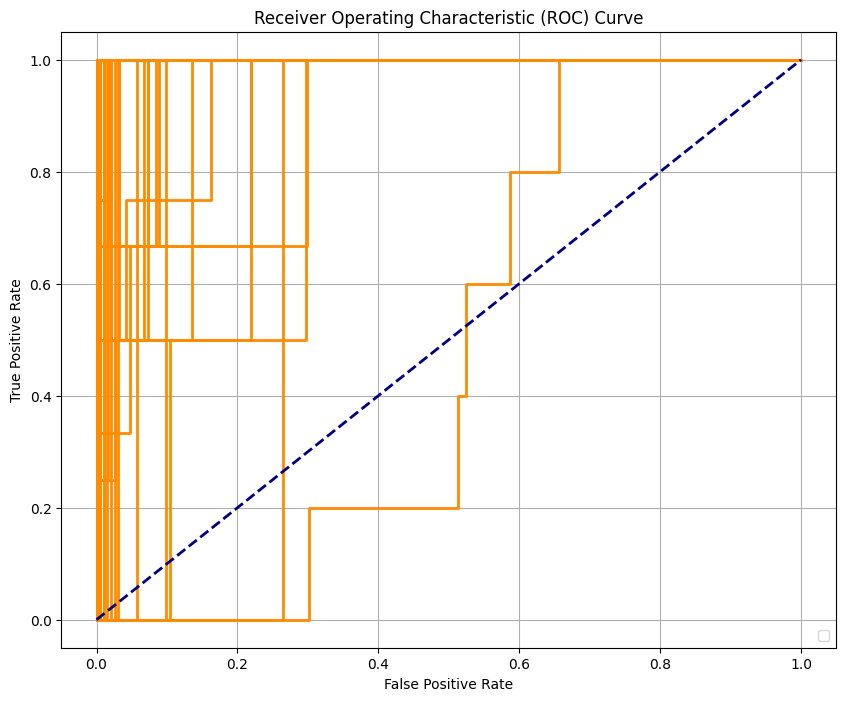

In [128]:
from sklearn.preprocessing import label_binarize

# Get class probabilities for each class
y_pred_prob = svm_model.predict_proba(X_test_scaled)  # Shape (num_samples, num_classes)

# Binarize the true labels for ROC curve calculation (One-vs-Rest)
y_test_binarized = label_binarize(y_test_labels, classes=np.unique(y_train_labels))  # Shape (num_samples, num_classes)

# Number of classes
n_classes = y_test_binarized.shape[1]

# ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

# ROC curve for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)

# Plot diagonal (chance level)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()